This notebook is based heavily on this blog post:

    https://adventuresinmachinelearning.com/neural-networks-tutorial/#simple-example

And covers its sections from the beginning up until and not including 4.0.

The most basic nueral network consists of multiple layers with some amount of nodes. The first layer houses the input nodes, the data being fed into the network, and the final layer has each node corrosponding to each output you might expect. Node layers in between have, from what I currently understand, an arbitrary amount of nodes.

Before describing the structure of computation in the network, we must define the *activation function*. An activation function is any single variable function which maps any real number to a value between $1$ and $0$. For the example in this document the specific activation function used is the *sigmoid*:

$$f(x) = \frac{1}{1 + e^{-x}}$$

The inputs to the activation function is described as follows:
For each node in the next uncomputed layer, a *weighted sum* is computed from every node in the computed layer, or at the start, the input layer. The weight for each node in the computed layer may be unique; note that for every weighted sum computed for each new node in the uncomputed layer, that sum will have its own set of weights, even though the coeffiecents still consists of the node values in the computed layer. Then, each weighted sum (the sum for each uncomputed node) will have a *bias* value added, before finally being inputted into the activation function.

Each line in the diagram below represents a weighted value which contributes to the summed input of the activation function for each cell in the new layer on its right side.

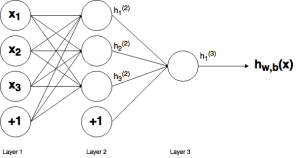

In [38]:
from IPython.display import Image
Image('Three-layer-network.png')

Below is Python code which demonstrates the effect different weights and biases have on the sigmoid curve. The full function can be described as:

$w = weight$
$b = bias$
$$f(x, w, b) = \frac{1}{1 + e^{-xw + b}}$$

<IPython.core.display.Javascript object>


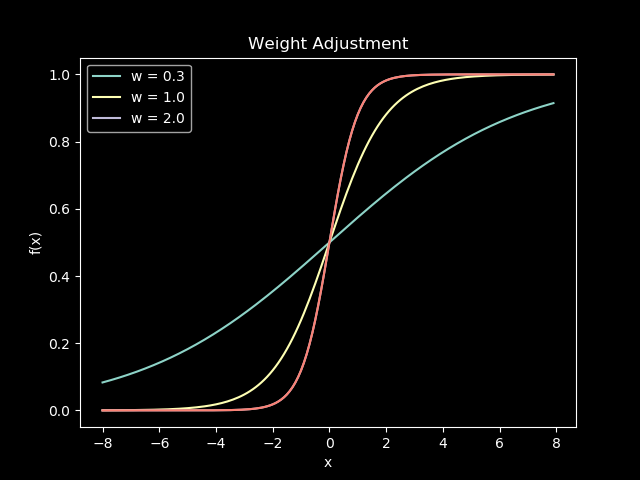

In [40]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

x = np.arange(-8, 8, 0.1)

plt.style.use('dark_background')

w1 = 0.3; w2 = 1.0; w3 = 2.0
l1 = 'w = 0.3'; l2 = 'w = 1.0'; l3 = 'w = 2.0'

for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
	f = 1 / (1 + np.exp( -x * w )) #sigmoid input times weight takes place here: ( -x * W )
	plt.plot(x, f, label=l)

plt.plot(x, f)
plt.xlabel('x'); plt.ylabel('f(x)'); plt.legend(); plt.title('Weight Adjustment')
plt.show()

A stronger weight makes the output of the sigmoid more sensitive to its input value, but the 'middle value' is still centered at zero. By changing the bias, as demonstrated below, we can change what value the function 'activates' at.

<IPython.core.display.Javascript object>


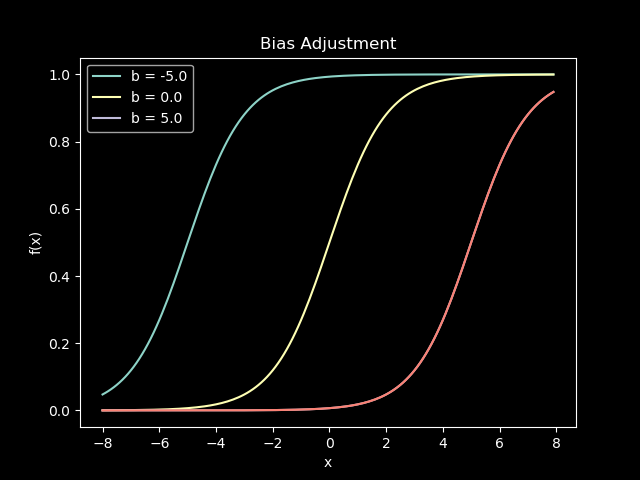

In [39]:
b1 = -5.0; b2 = 0.0; b3 = 5.0
l1 = 'b = -5.0'; l2 = 'b = 0.0'; l3 = 'b = 5.0'

for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
	f = 1 / (1 + np.exp(-x + b)) #bias added to input x
	plt.plot(x, f, label=l)

plt.plot(x, f)
plt.xlabel('x'); plt.ylabel('f(x)'); plt.legend(); plt.title('Bias Adjustment')
plt.show()

Now that we understand how the weights and biases effect the activation function, we can organize and execute the full neural network structure with initialized values for the input layer, weights, and biases. The first example in code represents explicit operations and loops to compute the output of the neural network, and is followed by an implentation using matrix multiplication which not only gives an equivalent result, but greatly simplifies the readibility (thus serving as the standard notation) as well as offering a significant speed up for Python.

Feel free to skip through the arduous, explicit implentation below if you feel it is not necessary.

In [43]:
import numpy as np

def sigmoid(x):
	return 1 / (1 + np.exp(-x))

w1 = np.array([[0.2, 0.2, 0.2],[0.4, 0.4, 0.4],[0.6, 0.6, 0.6]])
w2 = np.array([[0.5, 0.5, 0.5]])

w1 = np.array([[0.2, 0.2, 0.2],[0.4, 0.4, 0.4],[0.6, 0.6, 0.6]])
w2 = np.array([[0.5, 0.5, 0.5]])

weights = np.array([w1, w2])

b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

biases = np.array([b1, b2])

inpt = np.array([1.5, 2.0, 3.0])

def ff(inpt, weights, biases):

	layer = inpt
	#Object to keep track of node values in the current
	#working layer. Starts with input node array.

	#Each layer will have an array of weight arrays, which
	#themselves have weight values. For each output node
	#in the new layer, all nodes from the previous layer will
	#be multiplied by an associated weight, summed along-
	#-side that layers bias term; that sum will be run through
	#the activation function (in this case the sigmoid), and
	#that output is the value of that node in the new layer.

	#This process repeats for every node in the new layer,
	#and each new node will have its own set of weights to
	#modify the values of the previous layer, as well as an
	#associated bias term for each new node.

	#Since each layer to layer operation has its own set
	#of associated weights, we can loop through each layer
	#operation using the meta array of weights.
	for l in range(len(weights)):

		newLayer = []
		#Holder for nodes in the upcoming layer.
		#When filled, this object will overwite 
		#the 'layer' variable.

	#Loop through each set of weights in the current layer.
		for i in range(len(weights[l])):

			nodeSum = 0
			#We are now in the weight set for a single
			#node in the upcoming layer, so we can start
			#adjusting that node's value.

		#Loop through each weight, corrosponding to the
		#set of nodes in the previous layer.
			for k in range(len(weights[l][i])):
				
				#Multiply each weight by its
				#associated node in the current layer
				#and tally its sum.
				nodeSum += weights[l][i][k] * layer[k]

			#Add the bias term. Recall that every node
			#in the new layer gets a bias term added,
			#so we back out one loop from the weights
			#for every previous node into the loop
			#handling every node in the new layer.
			nodeSum += biases[l][i]

			#For every node in the new layer, we take
			#the computed sum and run it through our
			#activation function. Finally we append
			#the node to our new layer.
			newLayer.append(sigmoid(nodeSum))

		#We set our new layer of freshly computed nodes
		#and allow the function to use its next set(s)
		#of associated weight arrays to repeat the process.
		layer = newLayer

	return layer[0]

ff(inpt, weights, biases)

0.8354556612475645

Looping through $L$ and performing multiplication of matrices on weights to nodes, and addition of biases will achieve the desired result, equal to the scipt above:

$L =$ layer; as in, 'What layer are we on?'

$W =$ weight matrix

$w_{ij} =$ weight

$N^{L} =$ all nodes in layer $L$

$n^{L}_i =$ node $i$ in layer $L$

$b^{L}_i =$ bias $i$ in layer $L$

$W^{L} \cdot N^{L} = $
$\begin{pmatrix}
w_{11} & w_{12} & w_{13} \\ 
w_{21} & w_{22} & w_{23} \\ 
w_{31} & w_{32} & w_{33} \end{pmatrix}$
$\cdot $
$\begin{pmatrix}
n^{L}_{1} \\ 
n^{L}_{2} \\ 
n^{L}_{3} \end{pmatrix}$
$ + $
$\begin{pmatrix}
b^{L}_{1} \\ 
b^{L}_{2} \\ 
b^{L}_{3} \end{pmatrix}$
$ = \begin{pmatrix}
n^{L + 1}_{1} \\ 
n^{L + 1}_{2} \\ 
n^{L + 1}_{3} \end{pmatrix}$
$ = N^{L+1}$

 Just like above, the explicit node count for each layer, nor the amount of layers are not specified, as the amount of weight matrices for each layer will encode how many nodes exist in the next, uncomputed layer, and the amount of sets of weight matrices will determine the layers.


In [56]:
def ff(inpt, weights, biases):
    currentLayer = inpt
    for i in range(0, len(weights)):
        sums = weights[i].dot(currentLayer) + biases[i]
        currentLayer = sigmoid(sums)
    return currentLayer[0]
    
ff(inpt, weights, biases)

0.8354556612475645

As with the beginning of any nueral network project, the weights and baises are completely arbitrary (and dislike many so is our input layer). Adjusting the weights and biases to conform to desired output values from given inputs is covered next in *Gradient descent and optimisation*, section 4.0 on the blog post inspiring this notebook.

> https://adventuresinmachinelearning.com/neural-networks-tutorial/#simple-example